In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
len(merge_data["Mouse ID"].unique())

249

In [7]:
merge_data['Mouse ID'].value_counts()

g989    13
c766    10
s185    10
z969    10
c402    10
        ..
b447     1
n482     1
h428     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
duplicate_mouse_id = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_id = duplicate_mouse_id["Mouse ID"]
print(duplicate_mouse_id)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [9]:
duplicate_mouse = merge_data[merge_data["Mouse ID"].isin(duplicate_mouse_id) == False]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
drug_group = duplicate_mouse.groupby('Drug Regimen')
tumor_drug_group = drug_group["Tumor Volume (mm3)"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [42]:
means = drug_group.mean()['Tumor Volume (mm3)']
medians = drug_group.median()["Tumor Volume (mm3)"]
variance = drug_group.var()["Tumor Volume (mm3)"]
stddev = drug_group.std()["Tumor Volume (mm3)"]
sems = drug_group.sem()["Tumor Volume (mm3)"]

summary_table = 

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

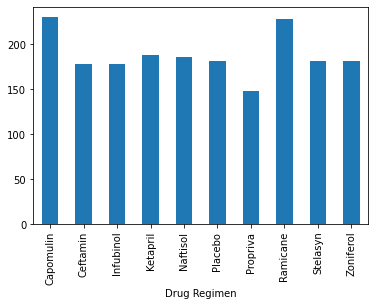

In [35]:
tumor_drug_group.plot.bar()
plt.show()

In [49]:
gender_mouse = duplicate_mouse.groupby("Sex")
gender_group = gender_mouse.count()
gender_group

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


<AxesSubplot:ylabel='Mouse ID'>

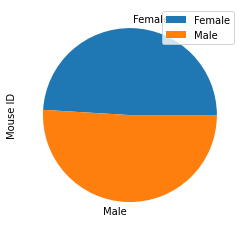

In [50]:
gender_group.plot.pie(y="Mouse ID")

In [13]:
#dropped_merge = merge_data.drop_duplicates()

In [14]:
#merge_data_ver_two = merge_data[merge_data["Mouse ID"].isin(duplicate_mouse["Mouse ID"]) == False]

In [15]:
#merge_data_ver_two

In [16]:
#dropped_merge

In [17]:
#len(merge_data_ver_two["Mouse ID"].unique())

In [18]:
#dropped_merge["Mouse ID"].value_counts()

In [19]:
#dropped_merge.count()

In [20]:
#drug_group = dropped_merge.groupby('Drug Regimen')
#tumor_drug_group = drug_group["Tumor Volume (mm3)"].count()